# LCS 2023 Game Predictor
This file contains all models used in the project.

In [46]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.stats import kendalltau
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
import seaborn as sns



# Dense Neural Net

In [47]:
# Get the CSV data from GitHub
!wget -O LCSgames.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/LCS_games.csv"
!wget -O LCSteams.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/compiled.csv"
!wget -O regionsgames.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/3_region_games_cleaned.csv"
!wget -O allregionsgames.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/max_region_games_cleaned.csv"

--2023-06-04 22:47:26--  https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/LCS_games.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25238 (25K) [text/plain]
Saving to: ‘LCSgames.csv’

LCSgames.csv        100%[===================>]  24.65K  --.-KB/s    in 0s      

2023-06-04 22:47:26 (65.4 MB/s) - ‘LCSgames.csv’ saved [25238/25238]

--2023-06-04 22:47:26--  https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/compiled.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1216 (1.2K) [text/plai

## Helper Functions

In [48]:
def plot_training(history):
    # Define needed variables
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()

def show_results(preds):
    rankings = []
    for i in range(len(preds)):
        rankings.append([float(preds[i]), X_teams[i][0]])
    rankings = sorted(rankings)
    rankings = [sublist[1] for sublist in rankings]
    rankings.reverse()
    actual_rankings = ['Cloud9','FlyQuest','100 Thieves','Counter Logic Gaming','Evil Geniuses','Golden Guardians','TSM','Team Liquid','Immortals','Dignitas']

    print('{:<24}{}'.format("Actual", "Predicted"))
    for i,(a, b) in enumerate(zip(actual_rankings, rankings)):
        print(i+1,'{:<24}{}'.format(a, b))

    team_to_number = {team: i for i, team in enumerate(actual_rankings)}
    actual = [team_to_number[value] for value in actual_rankings]
    predicted = [team_to_number[value] for value in rankings]

    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    print("---- Evaluation ----")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)

    corr, pvalue = kendalltau(actual, predicted)
    print("Kendall's Tau:", corr)
    print("P-value:", pvalue)

## Model with gold and cs statistics and only LCS teams

In [ ]:
# Load data from CSV file
data = pd.read_csv('LCSgames.csv')

# Split data into features and target variable
X = data.iloc[:, 3:].values
y = data.iloc[:, 2].values

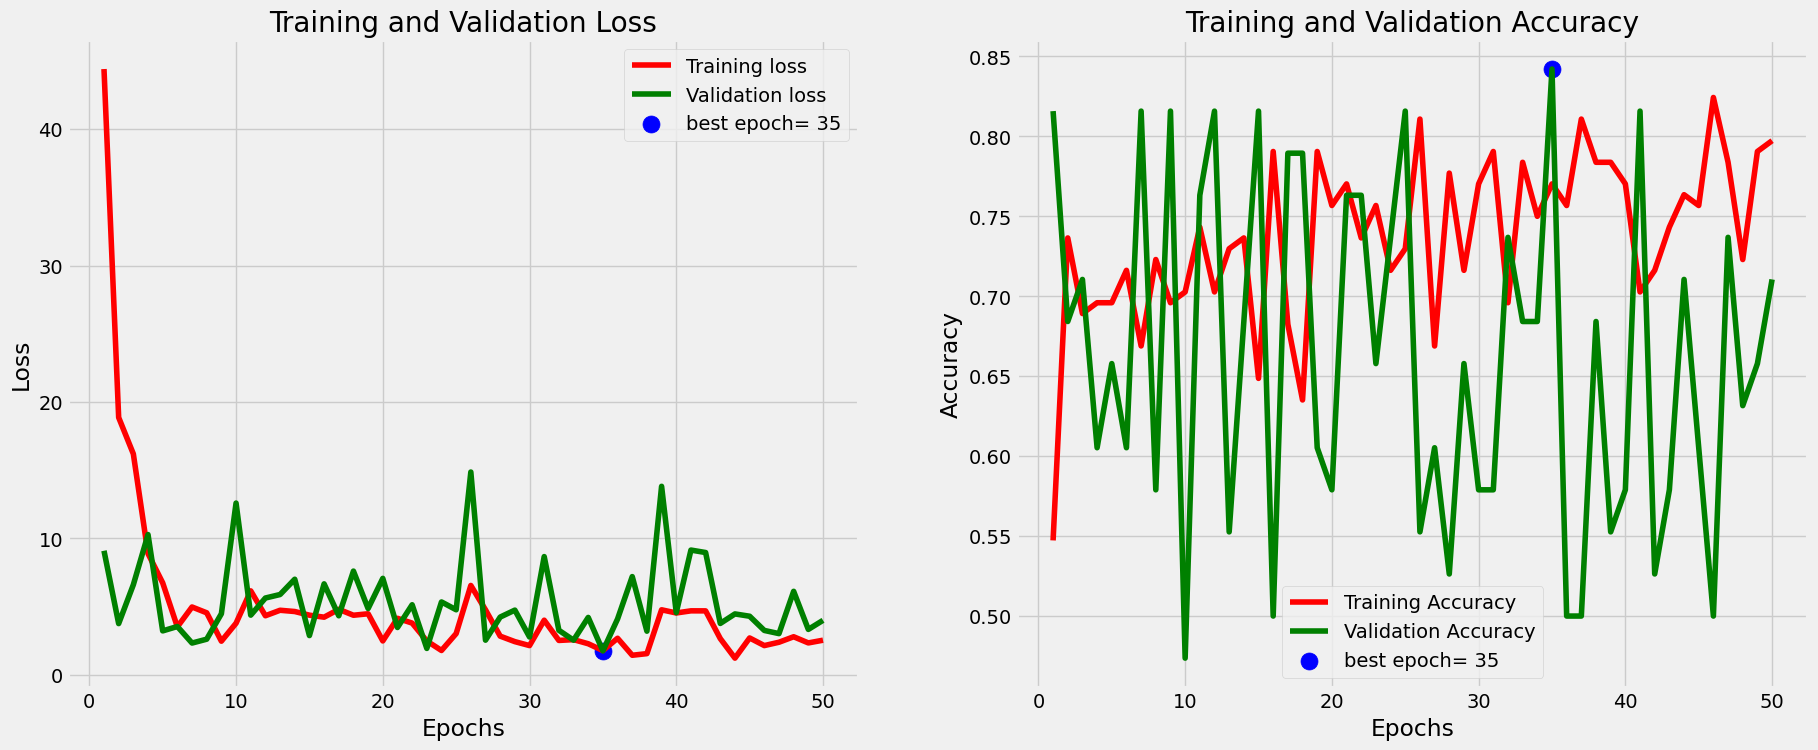

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
plot_training(history)

In [ ]:
teams = pd.read_csv('LCSteams.csv')
X_teams = teams[['Team']].values

X_test = teams[['CKPM','GSPD','GD15','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM','gd10','cs_min','csd_10','egpm']].values
# Evaluate model on test set
preds = model.predict(X_test)
show_results(preds)

1/1 [==============================] - 0s 98ms/step
Actual                  Predicted
1 Cloud9                  FlyQuest
2 FlyQuest                Golden Guardians
3 100 Thieves             Cloud9
4 Counter Logic Gaming    Team Liquid
5 Evil Geniuses           Evil Geniuses
6 Golden Guardians        100 Thieves
7 TSM                     Counter Logic Gaming
8 Team Liquid             TSM
9 Immortals               Immortals
10 Dignitas                Dignitas
---- Evaluation ----
Mean Squared Error: 5.6
Mean Absolute Error: 1.8
Kendall's Tau: 0.5111111111111111
P-value: 0.04662257495590829


## Model without gold or CS statistics and only LCS teams



In [ ]:
# Load data from CSV file
data = pd.read_csv('LCSgames.csv')

# Split data into features and target variable
X = data.iloc[:, [i for i in range(3, 17) if i != 5]].values
y = data.iloc[:, 2].values

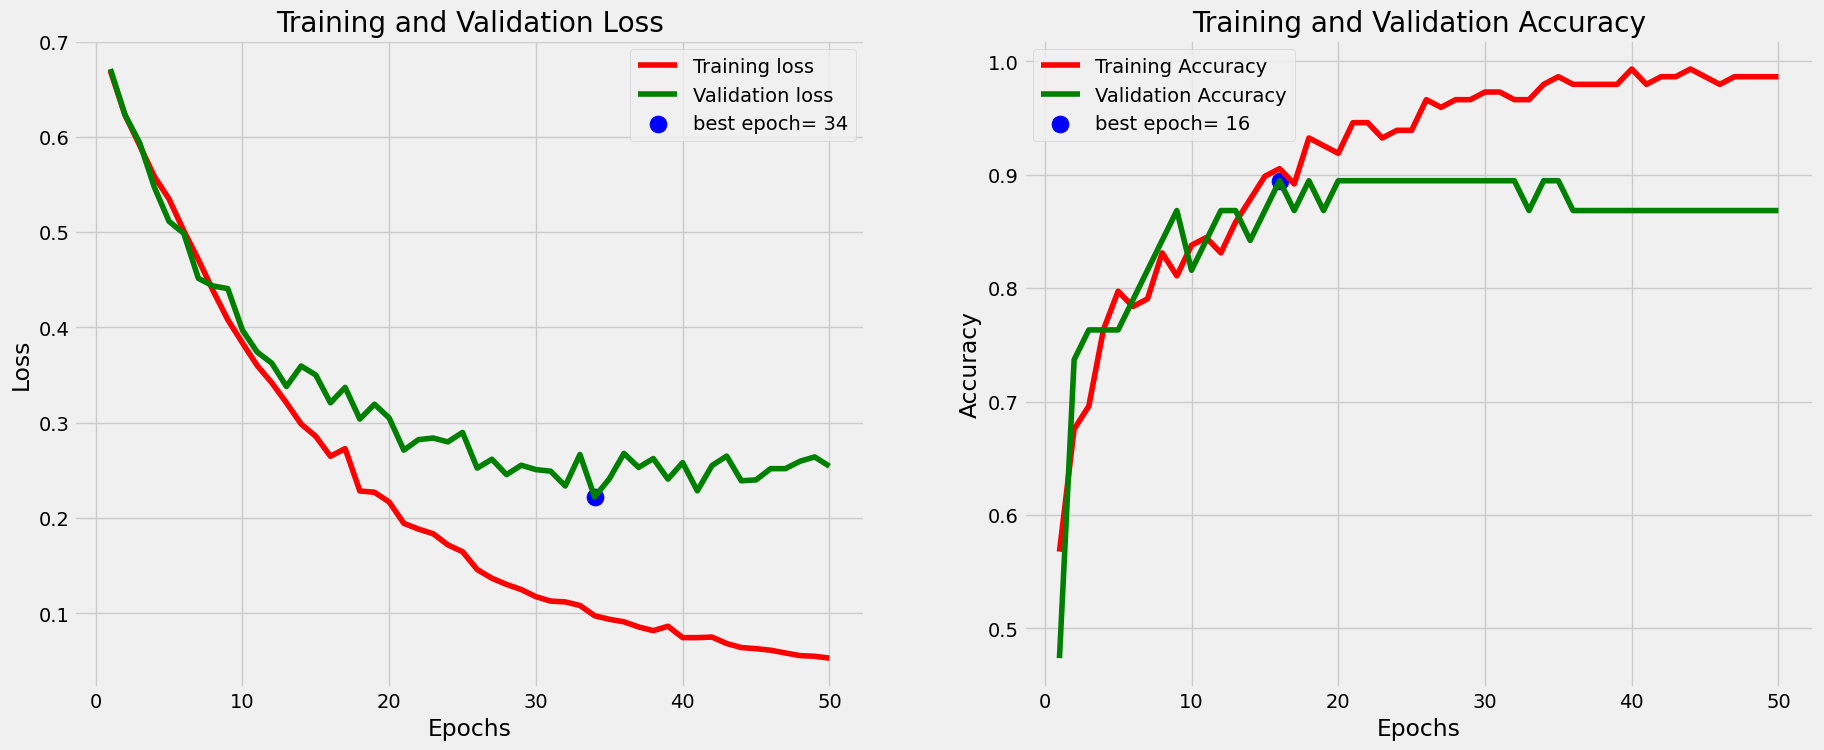

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=0)
plot_training(history)

In [ ]:
teams = pd.read_csv('LCSteams.csv')
X_teams = teams[['Team']].values
X_test = teams[['CKPM','GSPD','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM']].values

# Evaluate model on test set
preds = model.predict(X_test)
show_results(preds)

1/1 [==============================] - 0s 21ms/step
Actual                  Predicted
1 Cloud9                  Cloud9
2 FlyQuest                FlyQuest
3 100 Thieves             Team Liquid
4 Counter Logic Gaming    100 Thieves
5 Evil Geniuses           Golden Guardians
6 Golden Guardians        Evil Geniuses
7 TSM                     Counter Logic Gaming
8 Team Liquid             TSM
9 Immortals               Immortals
10 Dignitas                Dignitas
---- Evaluation ----
Mean Squared Error: 3.8
Mean Absolute Error: 1.2
Kendall's Tau: 0.6444444444444444
P-value: 0.009148478835978836


## Model trained on 3 regions, without gold or cs

In [ ]:
# Load data from CSV file
data = pd.read_csv('regionsgames.csv')

# Split data into features and target variable
X = data.iloc[:, [i for i in range(3, 17) if i != 5]].values
y = data.iloc[:, 2].values

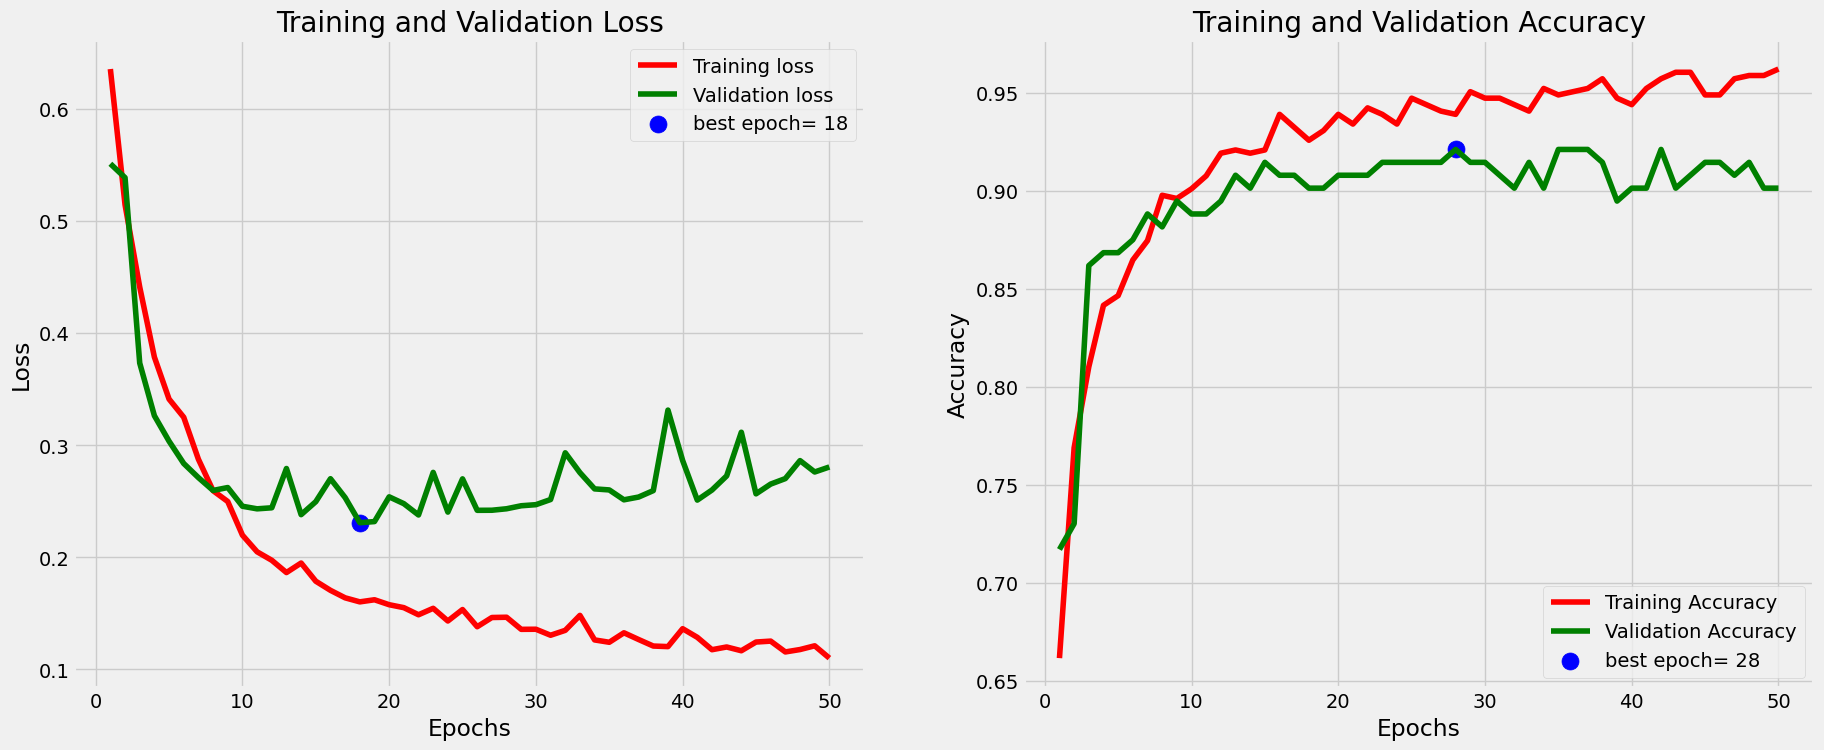

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),verbose=0)
plot_training(history)

In [ ]:
teams = pd.read_csv('LCSteams.csv')
X_teams = teams[['Team']].values
X_test = teams[['CKPM','GSPD','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM']].values

# Evaluate model on test set
preds = model.predict(X_test)
show_results(preds)

1/1 [==============================] - 0s 75ms/step
Actual                  Predicted
1 Cloud9                  Cloud9
2 FlyQuest                FlyQuest
3 100 Thieves             100 Thieves
4 Counter Logic Gaming    Evil Geniuses
5 Evil Geniuses           Golden Guardians
6 Golden Guardians        Team Liquid
7 TSM                     Counter Logic Gaming
8 Team Liquid             TSM
9 Immortals               Immortals
10 Dignitas                Dignitas
---- Evaluation ----
Mean Squared Error: 1.6
Mean Absolute Error: 0.8
Kendall's Tau: 0.8222222222222221
P-value: 0.0003576940035273369


## Model trained on all regions, without gold or cs

In [ ]:
# Load data from CSV file
data = pd.read_csv('allregionsgames.csv')

# Split data into features and target variable
X = data.iloc[:, [i for i in range(3, 17) if i != 5]].values
y = data.iloc[:, 2].values

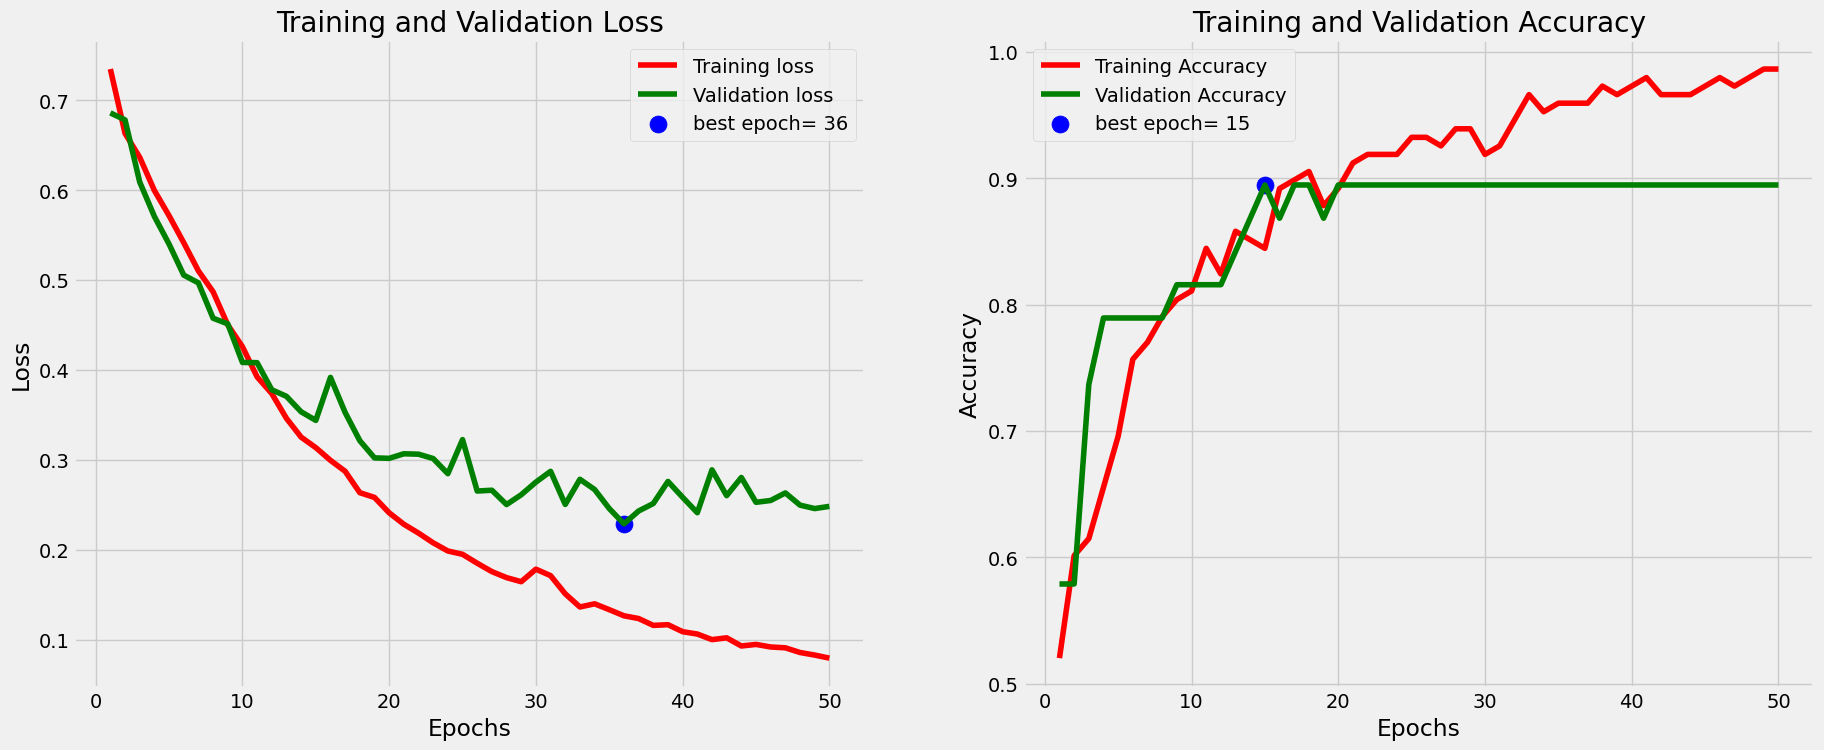

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build neural network model
model = Sequential()
model.add(Dense(64, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test),verbose=0)
plot_training(history)

In [ ]:
teams = pd.read_csv('LCSteams.csv')
X_teams = teams[['Team']].values
X_test = teams[['CKPM','GSPD','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM']].values#,'gd10','cs_min','csd_10','egpm']].values

# X_test = teams[['CKPM','GSPD','GD15','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM']].values#,'gd10','cs_min','csd_10','egpm']].values
# Evaluate model on test set
preds = model.predict(X_test)
show_results(preds)

1/1 [==============================] - 0s 61ms/step
Actual                  Predicted
1 Cloud9                  Cloud9
2 FlyQuest                FlyQuest
3 100 Thieves             100 Thieves
4 Counter Logic Gaming    Golden Guardians
5 Evil Geniuses           Team Liquid
6 Golden Guardians        Evil Geniuses
7 TSM                     Counter Logic Gaming
8 Team Liquid             TSM
9 Immortals               Immortals
10 Dignitas                Dignitas
---- Evaluation ----
Mean Squared Error: 2.4
Mean Absolute Error: 1.0
Kendall's Tau: 0.7333333333333333
P-value: 0.002212852733686067


# Random Forest Model

## Head to Head Models

In [14]:
!wget -O h2htrain.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/H2H_processing.csv"
!wget -O h2hplayeravg.csv "https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/H2H_lcsplayeraverages.csv"


--2023-06-04 19:52:34--  https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/H2H_processing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 590158 (576K) [text/plain]
Saving to: ‘h2htrain.csv’

h2htrain.csv        100%[===================>] 576.33K  --.-KB/s    in 0.006s  

2023-06-04 19:52:34 (87.7 MB/s) - ‘h2htrain.csv’ saved [590158/590158]

--2023-06-04 19:52:34--  https://raw.githubusercontent.com/leoyang33/LeagueGamePredictor/main/H2H_lcsplayeraverages.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 

In [19]:
data = pd.read_csv('h2htrain.csv')
playeravgs = pd.read_csv('h2hplayeravg.csv')

In [20]:
X = data.iloc[:, 1:252].values
y = data.iloc[:,252].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = RandomForestClassifier(n_estimators=20, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.4f}'.format(accuracy))


Test set accuracy: 0.9740


In [22]:
data.iloc[:, 1:252].columns

Index(['topkills1', 'topdeaths1', 'topassists1', 'topdoublekills1',
       'toptriplekills1', 'topquadrakills1', 'toppentakills1',
       'topdamagetochampions1', 'topdpm1', 'topdamageshare1',
       ...
       'supearned gpm0', 'supearnedgoldshare0', 'supcspm0', 'supgolddiffat100',
       'supxpdiffat100', 'supcsdiffat100', 'supgolddiffat150',
       'supxpdiffat150', 'supcsdiffat150', 'gamelength'],
      dtype='object', length=251)

In [23]:
# Get feature importances
importances = model.feature_importances_
print(len(importances))
# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'Stat' : data.iloc[:, 1:252].columns, 'Importance': importances})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

"earnedgpm"
feature_importances.head(20)

251


,Stat,Importance
91,botearned gpm1,0.079910
227,supassists0,0.068198
166,jgearned gpm0,0.066417
116,supearned gpm1,0.066413
191,midearned gpm0,0.060107
102,supassists1,0.035312
27,jgassists1,0.032653
40,jgtotalgold1,0.030790
152,jgassists0,0.029015
41,jgearned gpm1,0.025869


In [24]:
def get_player_stats(player):
    # returns tuple of ([avg stats], avggametime)
    row = (playeravgs[playeravgs['player'] == player].values)[0]
    stats = row[1:-1]
    time = row[-1]
    return stats, time

def get_lineup(players):
    res = []
    times = []
    for player in players:
        pstats, ptime = get_player_stats(player)
        res = res + list(pstats)
        times.append(ptime)
    avgtime = np.mean(times)
    res.append(avgtime)
    return res

Predict the outcome of Playoffs games (model was trained on regular season games only).

In [34]:
# Teams present in playoffs
c9 = ['Fudge','Blaber','EMENES','Berserker','Zven']
thieves = ['Tenacity','Closer','Bjergsen','Doublelift','Busio']
clg = ['Dhokla','Contractz','Palafox','Luger','Poome']
fly = ['Impact','Spica','VicLa','Prince','Winsome']
gg = ['Licorice','River','Gori','Stixxay','huhi']
eg = ['Ssumday','Inspired','jojopyun','FBI','Vulcan']

games = [c9+clg,fly+thieves,thieves+gg,clg+eg,c9+fly,gg+eg,fly+gg,c9+gg]
actual_outcomes = [1,1,0,0,1,1,0,1]

test = []
for game in games:
    test.append(get_lineup(game))
# 1 is first 5, 0 is second 5
predictions = model.predict(test)
print(predictions)
accuracy = accuracy_score(actual_outcomes, predictions)
print('Playoffs prediction accuracy: {:.4f}'.format(accuracy))

[1 1 0 0 1 0 0 1]
Playoffs prediction accuracy: 0.8750


Case study on GG vs FLY

In [44]:
game = [fly+gg]

stats = get_lineup(game[0])
stats[166]

193.1357

It is important to note that the 2 games our classifier incorrectly predicted were widely regarded as the 2 biggest upsets that occured this playoffs. Thus, this classifier seems to accurately predict the expected winner based on things that analysts/the public also predict on.

Case study on TL vs CLG

In [ ]:
tl = ['Summit','Pyosik','Haeri','Yeon','CoreJJ']
game = clg + tl
t = get_lineup(game)
p = model.predict([t])
p

array([1])

# Multiple Regression

Test on team-based data

In [4]:
# Load data from CSV file
data = pd.read_csv('regionsgames.csv')

# Split data into features and target variable
X = data.iloc[:, [i for i in range(3, 17) if i != 5]].values
y = data.iloc[:, 2].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
# Evaluate the model
print(y_pred)
for i,e in enumerate(y_pred):
    y_pred[i] = round(e)

accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.4f}'.format(accuracy))

[-0.10123368  0.17252238  0.83543298 -0.23802575  1.05871183  0.13482112
  0.12392514  0.21346646 -0.01435477  0.11286515  0.24032587  0.15964602
  0.1524163  -0.08460728 -0.04824724  0.53191052  0.89094392 -0.20615001
  0.84227362  0.63525438 -0.03576556 -0.10615106  0.18791604  0.01488487
 -0.137809    0.07288853  0.34039207  0.3466803   0.24327968  0.24784493
  0.76126809  1.17067722  0.94063431  0.75170324  0.76267906  0.84473542
  0.2062715   0.17500585  1.21207228 -0.05992942  0.42955843  0.17911683
  0.85524783  0.81840757 -0.02759341 -0.30986579  0.23515337  0.09197092
  0.24927263 -0.18736143  0.39971199  0.83873989  0.49533127  0.0287261
  0.36092706  0.95639497 -0.14972067  0.04360339  0.92240464  0.76364121
  0.31855237  0.36918929  0.67904303  1.09684133  1.0955027   0.037466
  0.87931372  0.14452482  0.46112419  1.18353837  0.92946242  0.75367234
  0.97459891  1.14481265  0.88530024  0.5352918   0.17110421  0.77551491
  0.05839512  0.58732981  0.033975    0.81487673 -0.05

In [11]:
teams = pd.read_csv('LCSteams.csv')
X_teams = teams[['Team']].values
X_test = teams[['CKPM','GSPD','FB%','FT%','F3T%','PPG','HLD%','FD%','DRG%','LNE%','JNG%','WPM','WCPM']].values

# Evaluate model on test set
preds = regr.predict(X_test)
show_results(preds)

Actual                  Predicted
1 Cloud9                  Cloud9
2 FlyQuest                FlyQuest
3 100 Thieves             Team Liquid
4 Counter Logic Gaming    100 Thieves
5 Evil Geniuses           Golden Guardians
6 Golden Guardians        Evil Geniuses
7 TSM                     Counter Logic Gaming
8 Team Liquid             TSM
9 Immortals               Immortals
10 Dignitas                Dignitas
---- Evaluation ----
Mean Squared Error: 3.8
Mean Absolute Error: 1.2
Kendall's Tau: 0.6444444444444444
P-value: 0.009148478835978836


Test on role-based data

In [15]:
data = pd.read_csv('h2htrain.csv')
playeravgs = pd.read_csv('h2hplayeravg.csv')
print(data.shape)
X = data.iloc[:, 1:252].values
y = data.iloc[:,252].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(381, 253)


In [16]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# Predict on the test set
y_pred = regr.predict(X_test)

# Evaluate the model
print(y_pred)
for i,e in enumerate(y_pred):
    y_pred[i] = round(e)

accuracy = accuracy_score(y_test, y_pred)
print('Test set accuracy: {:.4f}'.format(accuracy))

[-0.07569751  1.05756046  0.84920914  0.50614177  0.10293773 -0.18033587
 -0.30164765  0.87146573 -0.59568328  0.83420555  0.9802982   0.79775114
 -0.04212694  0.63564167  0.09400083  1.15659775  0.57819391  0.93459631
  0.78197394 -0.28187954  0.78146341 -0.10661378 -0.24863779  0.4108682
  0.18544509  0.40403514  0.88552489  0.16725509 -0.40084042  0.7865213
  1.14121355  1.23052452  0.81511035  0.8200038   1.32922462  0.73609299
  0.15199904  0.05353943  0.07510126  0.04497146  0.71851241  0.01821357
 -0.26493456  0.07305759  0.75514907  0.99040344  0.44597945  0.2194491
  0.97300225  0.05039186 -0.26001239  0.99584864  0.57060985  0.68708469
  0.36466864  0.92947596  1.74485255  0.1731939  -0.018934   -0.15633282
 -0.29657205  1.13123475  1.11886198 -0.35535883  0.18738118  0.6938546
  1.07741314  0.27481355  1.12318299  0.73678339  1.32984198  1.1803545
  0.95814792  0.33971854  0.51676863 -0.5402142   1.43262906]
Test set accuracy: 0.8961


In [17]:
# Teams present in playoffs
c9 = ['Fudge','Blaber','EMENES','Berserker','Zven']
thieves = ['Tenacity','Closer','Bjergsen','Doublelift','Busio']
clg = ['Dhokla','Contractz','Palafox','Luger','Poome']
fly = ['Impact','Spica','VicLa','Prince','Winsome']
gg = ['Licorice','River','Gori','Stixxay','huhi']
eg = ['Ssumday','Inspired','jojopyun','FBI','Vulcan']

games = [c9+clg,fly+thieves,thieves+gg,clg+eg,c9+fly,gg+eg,fly+gg,c9+gg]
actual_outcomes = [1,1,0,0,1,1,0,1]

test = []
for game in games:
    test.append(get_lineup(game))
# 1 is first 5, 0 is second 5
predictions = regr.predict(test)
print(predictions)
for i,e in enumerate(predictions):
    predictions[i] = round(e)
print(predictions)
accuracy = accuracy_score(actual_outcomes, predictions)
print('Playoffs prediction accuracy: {:.4f}'.format(accuracy))

[-295.38509867   19.38900809  248.60822384  -75.70706668 -225.03029023
 -305.75929243  223.99276499  -51.13301393]
[-295.   19.  249.  -76. -225. -306.  224.  -51.]
Playoffs prediction accuracy: 0.0000


# Heatmaps

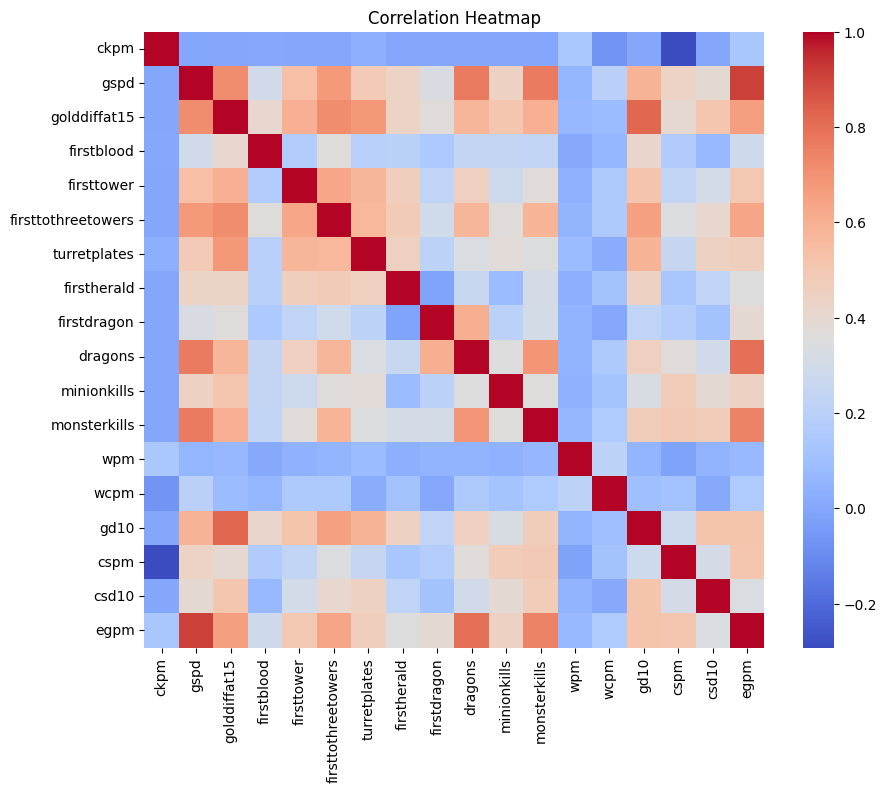

In [54]:
# Load data from CSV file
data = pd.read_csv('LCSgames.csv')

# Split data into features and target variable
df = data.iloc[:, 3:]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

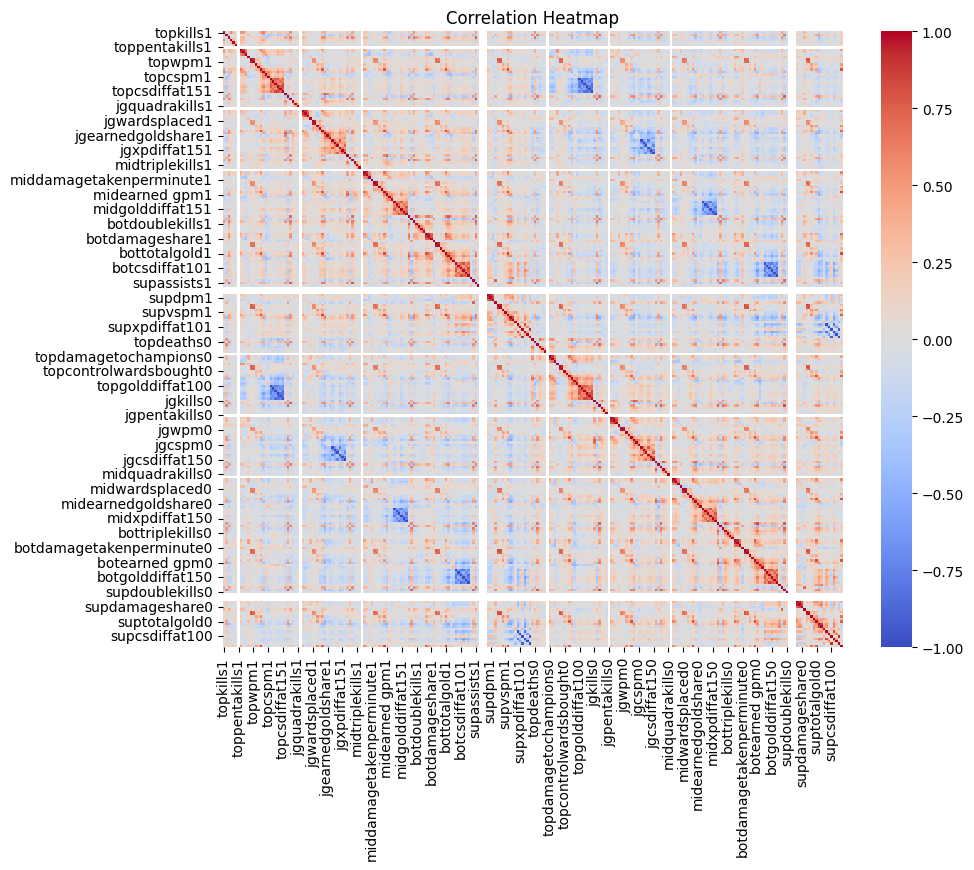

In [55]:
data = pd.read_csv('h2htrain.csv')
df = data.iloc[:, 1:252]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()